In [1]:
from agents import Consumer, Producer, Influencer
from content_market import ContentMarket
import numpy as np

In [2]:
num_producers = 5
num_influencers = 0
num_consumers = 5

topics = [[1, 10]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, num_producers, num_consumers, num_influencers)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
producer_colors = []
consumer_colors = []

for i in range(num_producers):
    #func = lambda x: exponential_decay(x, 1)
    # func = lambda x: 1.0
    func = lambda x: inverse_decay(x, 1, 2)
    producer = Producer(i, content_market.sample_topic(), func)
    content_market.add_producer(producer)
    
    color = np.random.rand(3,)
    producer_colors.append(color)

for i in range(num_consumers):
    #func = lambda x: exponential_decay(x, 1)
    #func = lambda x : 1.0
    func = lambda x: inverse_decay(x, 1, 2)
    consumer = Consumer(i, content_market.sample_topic(), func, 1, .1, 1)
    content_market.add_consumer(consumer)

    color = np.random.rand(3,)
    consumer_colors.append(color)

In [6]:
import matplotlib.pyplot as plt

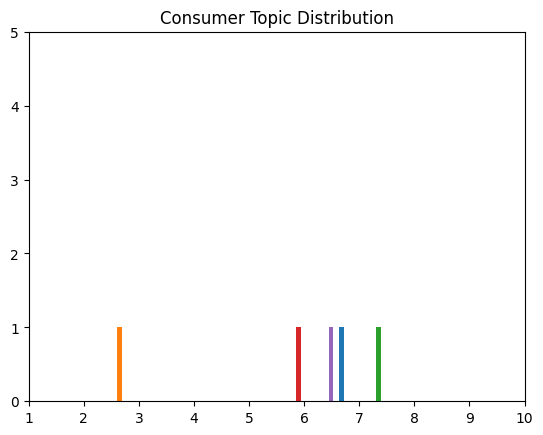

In [7]:
plt.figure()
plt.title("Consumer Topic Distribution")
plt.hist([c.main_interest for c in content_market.consumers])
plt.yticks(range(0, num_consumers + 1))
plt.xticks(range(1, 11))
plt.show()

In [8]:
consumer_stats, influencer_stats, producer_stats, total_stats, average_stats = content_market.optimize(1, 1, 100)

Iteration 0 / 100 done.
Iteration 1 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.030680835104566206
Producer topic change: 0.5444296084068652
Producer utility change: 0.18399331442865308
Iteration 2 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.12595386323317995
Producer topic change: 0.37838816875682574
Producer utility change: 0.09914651830440424
Iteration 3 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.14152492557758392
Producer topic change: 0.22860135297072634
Producer utility change: 0.037349753903244354
Iteration 4 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.10184598372640025
Producer topic change: 0.5898236793156673
Producer utility change: 0.012745586385961793
Iteration 5 / 100 done.
Consumer rate change: 0.0
Consumer utility change: 0.4011009579210242
Producer topic change: 0.3504755066265858
Producer utility change: 0.004263328848655212
Iteration 6 / 100 done.
Consumer rate change: 0.0
Consumer ut

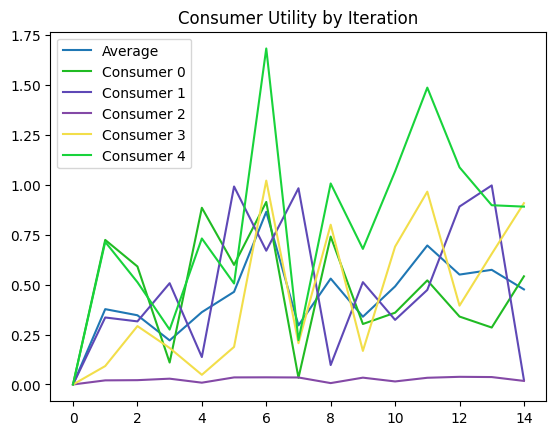

In [9]:
plt.figure()
plt.title("Consumer Utility by Iteration")
#plt.plot(total_stats['consumer_utilities'], label="Total")
plt.plot(average_stats['consumer_utilities'], label="Average")
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['utilities'], label="Consumer {}".format(consumer.index), color=consumer_colors[consumer.index])
plt.legend()
plt.show()

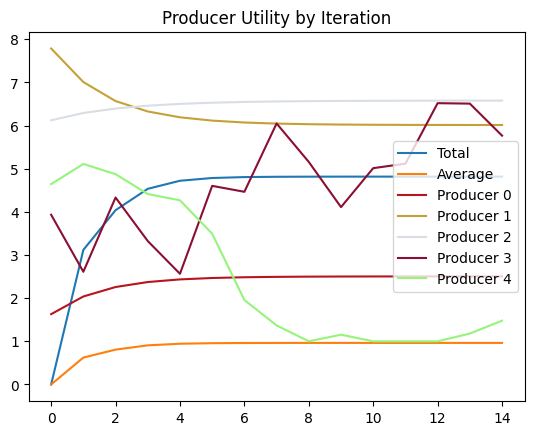

In [10]:
plt.figure()
plt.title("Producer Utility by Iteration")
plt.plot(total_stats['producer_utilities'], label="Total")
plt.plot(average_stats['producer_utilities'], label="Average")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topics'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
plt.legend()
plt.show()

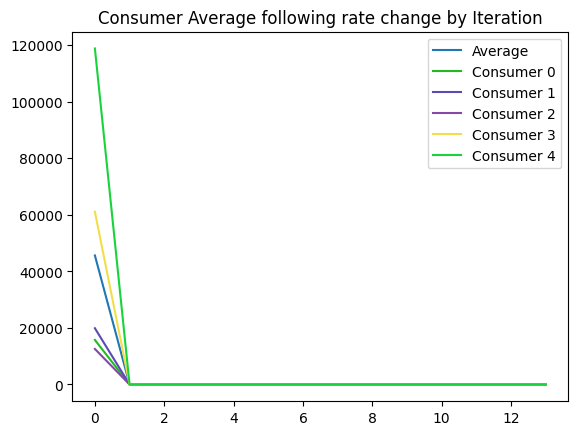

In [11]:
plt.figure()
plt.title("Consumer Average following rate change by Iteration")
plt.plot(average_stats['consumer_rate_change'], label='Average')
for consumer in content_market.consumers:
    plt.plot(consumer_stats[consumer.index]['rate_change'], label='Consumer {}'.format(consumer.index), color=consumer_colors[consumer.index])
plt.legend()
plt.show()

In [12]:
consumer_stats

{0: {'following_rates': [array([0.30505831, 0.12624259, 0.30063001, 0.03107659, 0.09607679,
          0.        ]),
   array([-2625.7825543 , -2925.53492001, 14375.57874044, -2941.18015873,
          -2941.86987208, -2941.21123532]),
   array([-2625.7825543 , -2925.53492001, 14375.57874044, -2941.18015873,
          -2941.86987208, -2941.21123532]),
   array([-2625.7825543 , -2925.53492001, 14375.57874044, -2941.18015873,
          -2941.86987208, -2941.21123532]),
   array([-2625.7825543 , -2925.53492001, 14375.57874044, -2941.18015873,
          -2941.86987208, -2941.21123532]),
   array([-2625.7825543 , -2925.53492001, 14375.57874044, -2941.18015873,
          -2941.86987208, -2941.21123532]),
   array([-2625.7825543 , -2925.53492001, 14375.57874044, -2941.18015873,
          -2941.86987208, -2941.21123532]),
   array([-2625.7825543 , -2925.53492001, 14375.57874044, -2941.18015873,
          -2941.86987208, -2941.21123532]),
   array([-2625.7825543 , -2925.53492001, 14375.57874044, 

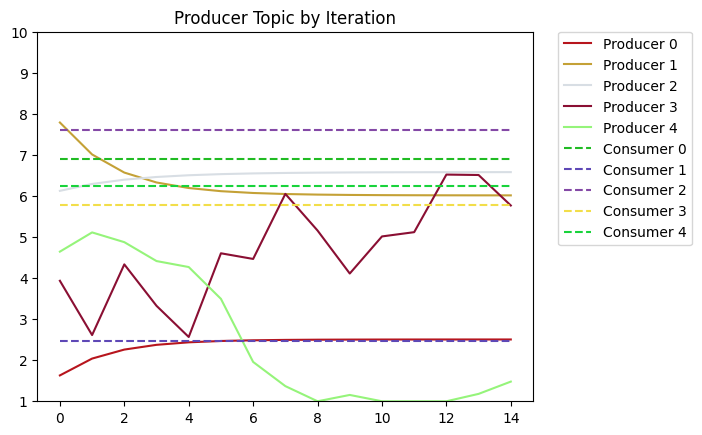

In [13]:
plt.figure()
plt.title("Producer Topic by Iteration")
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topics'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
for consumer in content_market.consumers:
    plt.plot([consumer.main_interest] * len(producer_stats[producer.index]['topics']), label='Consumer {}'.format(consumer.index), linestyle='--', color=consumer_colors[consumer.index])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(topics[0][0], topics[0][1])
plt.show()

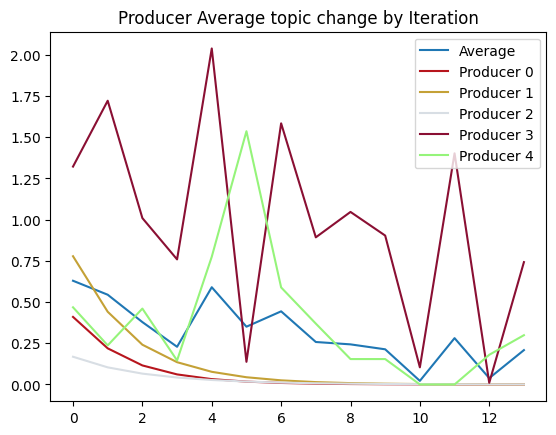

In [14]:
plt.figure()
plt.title("Producer Average topic change by Iteration")
plt.plot(average_stats['producer_topic_change'], label='Average')
for producer in content_market.producers:
    plt.plot(producer_stats[producer.index]['topic_change'], label='Producer {}'.format(producer.index), color=producer_colors[producer.index])
plt.legend()
#plt.ylim(topics[0][0], topics[0][1])
plt.show()